<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Clustering Methods LAB***

$ \ $


This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as:

* acidity

* sugar

* pH 

* alcohol

It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`. We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

In [ ]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

In [ ]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

$ \ $

----

## ***Question $(1)$***

$ \ $

$(1)$ Import the data.

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/Wine_Quality_Data.csv"
data = pd.read_csv(url)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


$ \ $

$(2)$  Examine the features and note which are continuous, categorical, and boolean.

In [ ]:
# describimos el tamaño del dataframe
data.shape

(6497, 13)

In [ ]:
# describimos el tipo de datos de las columnas
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

$ \ $ 

$(3)$  Examine the number of entries for each wine color.

In [ ]:
data["color"].value_counts()

white    4898
red      1599
Name: color, dtype: int64

$ \ $

$(4)$  Examine the distribution of quality values.

In [ ]:
cuenta_de_valores = data["quality"].value_counts().sort_index()
cuenta_de_valores

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

$ \ $

$(5)$  Make a histogram plot of the quality for each of the wine colors.

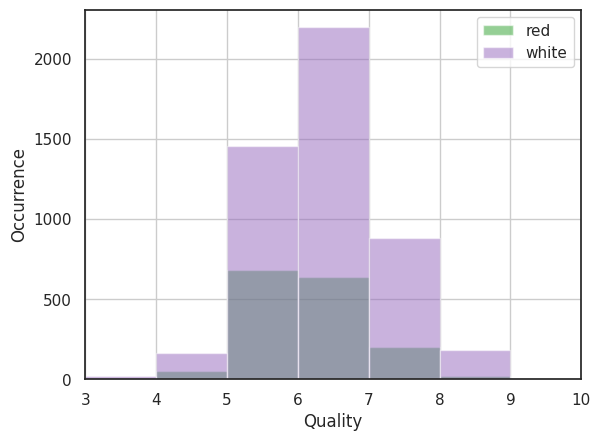

In [ ]:
# personalizamos los colores
red = sns.color_palette()[2]
white = sns.color_palette()[4]

# establecemos los contenedores para histograma
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# creamos los ejes de la proxima imagen
ax = plt.axes()

#realizamos una iteracion sobre los colores 
for color, plot_color in zip(['red', 'white'], [red, white]):

    # tomamos los renglones de data que satisfacen que la columna "color" es igual a color, y la columna 'quality'
    q_data = data.loc[data["color"] == color, 'quality']

    # tomamos un histograma (x,y) con
    # x = bin_range
    # y = numero de elementos de x
    q_data.hist(bins = bin_range, alpha = 0.5, ax = ax, color = plot_color, label = color)
    
# describimos la leyenda de la imagen
ax.legend() 

# establecemos las etiquetas del eje x y el eje y
ax.set(xlabel = 'Quality', ylabel = 'Occurrence')

# establecemos los limites del eje x
ax.set_xlim(3, 10);

$ \ $

----

## ***Question $(2)$***

$ \ $

$(1)$ Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).

In [ ]:
# examinamos el tipo de datos de los rasgos (features) del dataframe
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# describimos el nombre de las columnas del dataframe data
columns = data.columns

# tomamos el nombre de las columnas diferentes de 'color' y 'quality'
float_columns = [x for x in columns if x not in ['color', 'quality']]

# tomamos la correacion del dataframe data[float_columns]
corr_mat = data[float_columns].corr()

# describimos el numero de elementos de float_columns
n = len(float_columns)

# realizamos una iteracion entre la lista [0,..,n-1]
for x in range(n):

    # actualizamos el valor de corr_mat.iloc[x, x]  por (0,0)
    corr_mat.iloc[x, x] = 0.0
    
# describimos en pantalla la correlacion actualizada
corr_mat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029


In [ ]:
# describimos las cmaximas correlaciones por parejas
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

$ \ $

$(2)$ We examine the skew values in anticipation of transformations.

In [ ]:
# describimos los valores sesgados del dataframe data[float_columns]
list_skew = data[float_columns].skew()

# ordenamos los valores sesgados de mayor a menor
skew_columns = list_skew.sort_values(ascending = False)
skew_columns

chlorides               5.399828
sulphates               1.797270
fixed_acidity           1.723290
volatile_acidity        1.495097
residual_sugar          1.435404
free_sulfur_dioxide     1.220066
alcohol                 0.565718
density                 0.503602
citric_acid             0.471731
pH                      0.386839
total_sulfur_dioxide   -0.001177
dtype: float64

In [ ]:
# tomamos los renglones con valores mayores que 0.75
skew_columns = skew_columns.loc[skew_columns > 0.75]

# mostramos en pantalla la data obtenida
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

$ \ $

$(3)$ We perform the $log$ transform on skewed columns.


In [ ]:
# tomamos los indices de skew_columns y formamos con estos elementos una lista
lista = skew_columns.index.tolist()

# Realizamos transformación log en las columnas sesgadas
for col in lista:
    data[col] = np.log1p(data[col])

$ \ $

$(4)$ We perform feature scaling.

In [ ]:
# creamos un objeto de escala estandar
sc = StandardScaler()

# entrenamos nuestro modelo de escala estandar con la data X=data[float_columns] y ademas obtenemos un conjunto de datos transformados X-----> T(X)
# luego actualizamos los valores de data[float_columns]con los valores obtenidos de la transformacion
data[float_columns] = sc.fit_transform(data[float_columns])

# mostramos los primeros 5 renglones de nuestro dataframe actualizado
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red
4,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red


$ \ $

$(5)$ Finally, we get the pairplot of the transformed and scaled features.

In [ ]:
# establecemos el contexto de 
sns.set_context('notebook')

# realizamos un pairplot 
sns.pairplot(data[float_columns + ['color']], hue = 'color', hue_order = ['white', 'red'], palette = {'red' : red, 'white' : 'gray'});

Output hidden; open in https://colab.research.google.com to view.

$ \ $

-----

## ***Question $(3)$***

$ \ $

$(1)$ Fit a $K$-means clustering model with two clusters.


In [ ]:
# creamos un modelo de tipo kmeans con 2 clusters
km = KMeans(n_clusters = 2, random_state = 42)

# entrenamos nuestro modelo de tipo kmeans con la data data[float_columns]
km.fit(data[float_columns])

# predecimos un conjunto de datos con nuestro modelo entrenado y creamos una nueva columna en el dataframe data llamada "kmeans" y asignamos a esta los valores predecidos
data['kmeans'] = km.predict(data[float_columns])


$ \ $

$(2)$ Examine the clusters by counting the number of red and white wines in each cluster.

In [ ]:
data[['color', 'kmeans']].value_counts()

color  kmeans
white  1         4811
red    0         1576
white  0           87
red    1           23
dtype: int64

In [ ]:
#(1) tomamos el dataframe data[['color', 'kmeans']]
#(2) agrupamos por la tupla ()'kmeans', 'color') teniendo en cuenta el tamaño ------> me imagino es el orden lexicografico
data[['color', 'kmeans']].groupby(['kmeans', 'color']).size().to_frame()

0
kmeans color      
0      red    1576
       white    87
1      red      23
       white  4811

In [ ]:
# cambiamos el nombre de la columna "0" por "number"
data[['color', 'kmeans']].groupby(['kmeans', 'color']).size().to_frame().rename(columns = {0 : 'number'})

number
kmeans color        
0      red      1576
       white      87
1      red        23
       white    4811

$ \ $

-----

## ***Question $(4)$***

$ \ $

$(1)$ Now fit $K$-Means models with cluster values ranging from $1$ to $20$.

In [ ]:
# creamos una lista vacia
km_list = []

# realizamos una iteracion sobre la sucesion finita {1,2,3,...,20}
for i in range(1,21):

    # creamos un modelo de tipo kmeans con 1 cluster
    km = KMeans(n_clusters = i, random_state = 42)

    # entrenamos nuestro modelo con el dataframe data[float_columns]
    km.fit(data[float_columns])
    
    # creamos una serie 
    data_series = pd.Series({'clusters': i, 'inertia': km.inertia_, 'model': km})

    # pegamos el resultado de nuestra serie en la lista km_list
    km_list.append(data_series)

In [50]:
# pd.DataFrame(km_list)

$ \ $

$(2)$ we concatenate the elements of the previous list.

In [49]:
# concatenamos los elementos de la lista anterior 
# resume = pd.DataFrame(km_list)
resume = pd.concat(km_list, axis = 1).T
resume.head()

,clusters,inertia,model
0,1,71467.0,"KMeans(n_clusters=1, random_state=42)"
1,2,55455.964329,"KMeans(n_clusters=2, random_state=42)"
2,3,45199.883382,"KMeans(n_clusters=3, random_state=42)"
3,4,40674.050611,"KMeans(n_clusters=4, random_state=42)"
4,5,38204.570018,"KMeans(n_clusters=5, random_state=42)"


$ \ $

$(3)$ We create a new dataframe using only the 'clusters' and 'inertia' columns, and then set the "clusters" column as indexes.

In [ ]:
# creamos un nuevo dataframe usando solamente usando  las columnas 'clusters' y  'inertia', para luego establecer como indices a la columna "clusters"
plot_data = resume[['clusters', 'inertia']].set_index('clusters')
plot_data.head()

,inertia
clusters,
1,71467.0
2,55455.964329
3,45199.883382
4,40674.050611
5,38204.570018


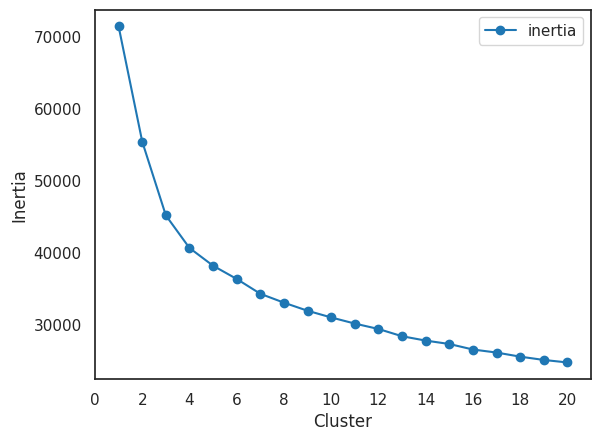

In [ ]:
# realizamos un plot del dataframe plot_data donde describimos los puntos (x,y) = (cluster, inertia) con objetos de la forma "o"
ax = plot_data.plot(marker = 'o', ls = '-')

# establecemos las etiquetas de los numeros del eje x como los siguientes numeros {0,2,4,6,...,20}
ax.set_xticks(range(0, 21, 2))

# establecemos el limite del acotamiento del eje x
ax.set_xlim(0, 21)

# establecemos las etiquetas del eje x y el eje y
ax.set(xlabel = 'Cluster', ylabel = 'Inertia');

$ \ $

-----

## ***Question $(5)$***

$ \ $

$(1)$ We create an agglomerative clustering model with two clusters.


In [ ]:
# creamos un modelo AgglomerativeClustering con 2 clusters
ag = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', compute_full_tree = True)

$ \ $

$(2)$ We fit our previous model.

In [ ]:
# entrenamos nuetsro modelo con el dataframe data[float_columns]
ag.fit(data[float_columns])

AgglomerativeClustering(compute_full_tree=True)

$ \ $

$(3)$ We predict a dataset with our fitted model.

In [ ]:
# predecimos un conjunto de datos con nuestro modelo entrenado y creamos una nueva columna para nuestro dataframe data lla,ada 'agglm'
data['agglom'] = ag.fit_predict(data[float_columns])

In [ ]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,kmeans,agglom
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red,0,1
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red,0,1
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red,0,1
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red,0,1
4,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red,0,1


Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both $K$-means and agglomerative clustering.

$ \ $

$(4)$ Compare the results to those obtained by $K$-means with regards to the color by:

* Reporting the number of "$\color{lightgreen}{\text{color}}$" observations in each "$\color{lightblue}{\text{cluster}}$" for  "$\color{lightblue}{\text{$K$-means}}$".

* Reporting the number of "$\color{lightgreen}{\text{color}}$" observations in each "$\color{lightblue}{\text{cluster}}$" for  "$\color{lightblue}{\text{agglomerative clustering}}$".

In [ ]:
data[['color','agglom','kmeans']].groupby(['color','agglom']).count().rename(columns = {"kmeans" : 'number'})

number
color agglom        
red   0           31
      1         1568
white 0         4755
      1          143

In [ ]:
data[['color','agglom','kmeans']].groupby(['color', 'kmeans']).count().rename(columns = {"agglom" : "number"})

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

In [ ]:
data[['color','agglom','kmeans']].groupby(['color','agglom','kmeans']).size().to_frame().rename(columns={0 : 'number'})

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

$ \ $

$(5)$ Visualize the $\color{lightblue}{\text{dendrogram}}$ produced by agglomerative clustering. 

$ \ $

$\underline{\color{lightgreen}{\text{Hint:}}}$ SciPy has a module called [cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

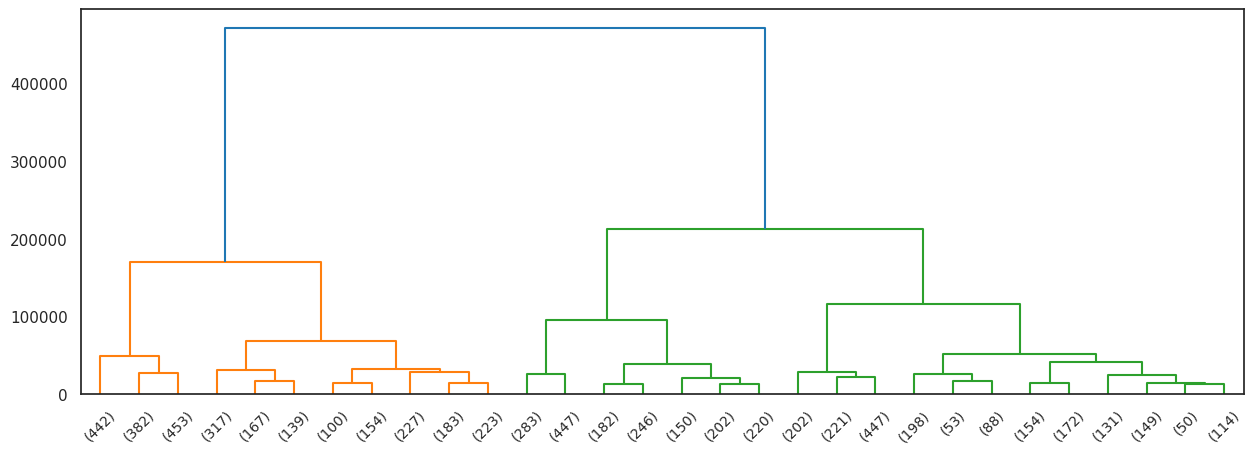

In [ ]:
# creamos un modelo de tipo hierarchy
# ag = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', compute_full_tree = True)
children = ag.children_
Z = hierarchy.linkage(children, method = 'ward')

# creamos una imagen para realizar un plot
fig, ax = plt.subplots(figsize = (15,5))

#  un dendrograma es un diagrama de árbol, especialmente uno que muestra relaciones 
den = hierarchy.dendrogram(Z, orientation = 'top', p = 30, truncate_mode = 'lastp',  show_leaf_counts = True, ax = ax)

$ \ $

------

## ***Question $(6)$***

$ \ $

$(1)$ Create a binary target variable $\color{lightblue}{\text{y}}$ such that:

* It describes if the "quality" is greater than $7$ or not.

* The values are $0$ or $1$ (FALSE - TRUE).

In [ ]:
y = (data['quality'] > 7).astype(int)

$ \ $

$(2)$ Create a variable called `X_with_kmeans` from data, by dropping the columns 'agglom', 'color' and 'quality' from the dataset. 

In [ ]:
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis = 1)

$ \ $

$(3)$ Create `X_without_kmeans` from that by dropping "kmeans".

In [ ]:
X_without_kmeans = X_with_kmeans.drop('kmeans', axis = 1)

$ \ $

$(4)$ For both datasets, using [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) get the following things:

* Take the corresponding dataset and do $10$ splits.

* Take the corresponding dataset and fit $10$ $\color{lightblue}{\text{Random Forest Classifiers}}$.

* Take the corresponding dataset and find the mean of the $\color{lightblue}{\text{ROC-AUC}}$ scores from these $10$ classifiers.

In [ ]:
def get_avg_roc(estimator, X, y, n = 10):

    # creamos una lista vacia
    roc_auc_list = []

    # StratifiedShuffleSplit proporciona índices de (entrenamiento/prueba) para dividir datos en conjuntos de entrenamiento/prueba .
    sss = StratifiedShuffleSplit(n_splits = n, random_state = 6532)

    # proporcionamos los indices de (entrenamiento/prueba)
    conjunto = sss.split(X, y)

    # realizamos una iteracion sobre el conjunto -----> obteniendo indices de la forma (entrenamiento, prueba)
    for train_index, test_index in conjunto:

        # describimos los datos de entrenamiento correspondientes a X
        X_train = X.iloc[train_index]

        # describimos los datos de prueba correspondientes a X
        X_test = X.iloc[test_index]

        # describimos los datos de entrenamiento correspondientes a y
        y_train = y.iloc[train_index]

        # describimos los datos de prueba correspondientes a y
        y_test = y.iloc[test_index]

        # tomamos el modelo estimador y lo entrenamos en la data de prueba
        estimator.fit(X_train, y_train)

        # predecimos un conjunto de datos con nuestro modelo predecido
        y_predicted = estimator.predict(X_test)

        # predecimos la probabilidad 
        y_scored = estimator.predict_proba(X_test)[:, 1]

        # calculamos los valores de roc_auc_score sobre la data y_test, y_scored
        valor = roc_auc_score(y_test, y_scored)

        # pegamos el valor anterior al diccionario creado anteriormente
        roc_auc_list.append(valor)

    # obtenemos el promedio del diccionario anterior
    return np.mean(roc_auc_list)

In [ ]:
# creamos un modelo clasificatorio aleatorio de bosques
estimator = RandomForestClassifier()

# usamos  la funcion anterior get_avg_roc con los parametros establecidos
roc_with_kmeans = get_avg_roc(estimator, X_with_kmeans, y)

# usamos  la funcion anterior get_avg_roc con los parametros establecidos
roc_without_kmeans = get_avg_roc(estimator, X_without_kmeans, y)

In [ ]:
roc_with_kmeans

0.896202380952381

In [ ]:
roc_without_kmeans

0.9053849206349207

$ \ $

$(4)$ Compare the average roc-auc scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.

In [ ]:
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9053849206349207"
Using kmeans cluster as input to Random Forest, roc-auc is "0.896202380952381"


$ \ $

$(5)$ Create the basis training set from `data` by restricting to float_columns.


In [ ]:
X_basis = data[float_columns]

$ \ $

$(6)$ We create a function that takes a natural number as parameter, and return the concatenation between $\color{lightblue}{X_{basis}}$ and predicted data given by the $\color{lightblue}{\text{KMeans model}}$ using $\color{lightgreen}{\text{Onehotencoder}}$.

In [ ]:
def create_kmeans_columns(n):

    # creamos un modelo de tipo KMeans con n clusters
    km = KMeans(n_clusters = n) 

    # entrenamos nuestro modelo
    km.fit(X_basis)

    # predecimos un conjunto de datos con nuestro modelo entrenado
    predict = km.predict(X_basis)

    # describimos nuestros datos predecidos en forma de serie
    km_col = pd.Series(predict)

    # pd. get_dummies() convertirá su columna categórica (columna de etiquetas) en columnas indicadoras (columnas de 0 y 1)
    # km_cols = pd.get_dummies(km_col, prefix = 'kmeans_cluster')
    km_cols = pd.get_dummies(predict, prefix = 'kmeans_cluster')    

    # la funcion devuelve un dataframe que se obtiene al concatenar X_basis y km_cols
    return pd.concat([X_basis, km_cols], axis = 1)
    

$ \ $

$(7)$  Using ***Logistic Regression*** models, compute the average roc-auc-score of $n$ clusters, with $n\in \{1,\dots,20\}$.

In [ ]:
# creamos un modelo de regresion logistica
estimator = LogisticRegression()

# describimos una lista con los numeros [1,2,3,.....,20]
lista = range(1, 21)

# describimos una lista con los diferentes valores de la transformacion
roc_auc_list = [get_avg_roc(estimator, create_kmeans_columns(n), y) for n in lista]

$ \ $

$(7)$ Plot the average roc-auc scores.

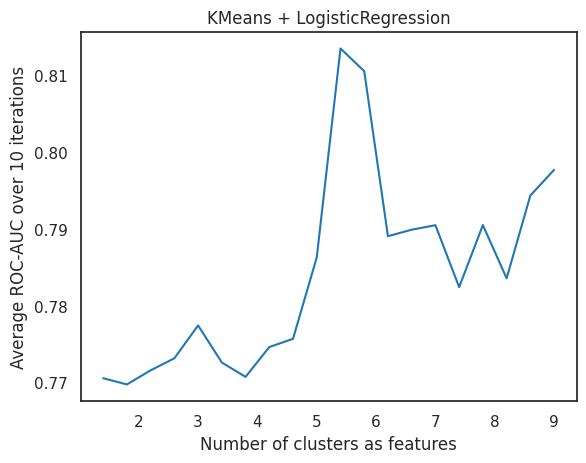

In [ ]:
# describimos los ejes del plot
ax = plt.axes()

# realizamos un plot (x, y) donde
# x = lista
# y = roc_auc_list
ax.plot(lista, roc_auc_list)

# establecemos la etiquetas -----> texto y valores correspondientes en los ejes
ax.set(xticklabels = lista,
       xlabel = 'Number of clusters as features',
       ylabel = 'Average ROC-AUC over 10 iterations',
       title = 'KMeans + LogisticRegression')

# si deseamos poner cuadricula
# ax.grid(True)

# mostramos la imagen en pantalla
plt.show()